1.Domain-specific area
--
The first step of the coursework is to identify and describe the domain-specific area. This is an area of industry or science where the regression model will contribute. It can be any field which can benefit from machine learning.


There are many forms of weatlth in today current climate, many people are constantly chasing monetary gain and often time they forget about other aspects to being wealthy. At the cost of their health ofte times coming second to earning money. 



2.Dataset
--
The dataset I have obtained for my purposes has been acquired from Kaggle.com, it contains information about a group of people. Within the dataset, there are people with and without diabetes.

The source of the dataset is Vincent Sigillito (vgs@aplcen.apl.jhu.edu) Research Center, RMI Group Leader Applied Physics Laboratory The Johns Hopkins University Johns Hopkins Road Laurel, MD 20707 (301) 953-6231

The dataset has a total of 768 records. the main data types of the dataset is int and float. 

The dataset is part of the public domain, where the dataset can be used freely without the need to ask for permission from the author. 


3.Objectives of the project
--
The aim of studying this dataset is to understand what causes diabetes with the information available to me in my dataset. 

Data can help us identitfy which factors have a greater weightage, this can help future peoples avoid repeating the same lifestyle to reduce diabetes. 


II. Implementation
--
### 4.Convert/store the dataset locally and preprocess the data. 
As acquired from kaggle, the dataset is stored in a CSV file. Using pandas, we can read the file and then proceed to preprocess it.

The dataset is aready in its 1NF, completely denormalised.

In [1]:
%matplotlib inline 

# import modules
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

#read csv file with pandas
data  = pd.read_csv('diabetes.csv')

The following few command help to check the intergrity of the dataset and indetify if there is a need to edit the dataset slightly so that it can be processed.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As can be observed above, the data has field which are 0, this means that we have to check the data for any incorrect fields.

In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no Na fields

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

However there are field which are null

In [6]:
data["Glucose"]=data["Glucose"].replace(0,np.nan)
data["BloodPressure"]=data["BloodPressure"].replace(0,np.nan)
data["SkinThickness"]=data["SkinThickness"].replace(0,np.nan)
data["Insulin"]=data["Insulin"].replace(0,np.nan)
data["BMI"]=data["BMI"].replace(0,np.nan)

We replace the null fields with NaN

In [7]:
data.fillna(data.median(), inplace=True)

Then replace each NaN field with the column's median value

In [8]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As shown above, the empty values have been replaced and filled.

### 5.Identify key series of the dataset and provide statistical summary of the data, including:

#### Measures of central tendency

In [10]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [11]:
data.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99.0,72.0,29.0,125.0,32.3,0.254,22.0,0.0
1,NaN,100.0,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [12]:
data.mean()

Pregnancies                   3.845052
Glucose                     121.656250
BloodPressure                72.386719
SkinThickness                29.108073
Insulin                     140.671875
BMI                          32.455208
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

The mode, median and mean allow us the indentify the distribution of data.

Genereally, since the mode and median is lower than the mean we have data which is positively skewed

#### Measures of spread

Interquartile Range

C:\Users\grego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\grego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

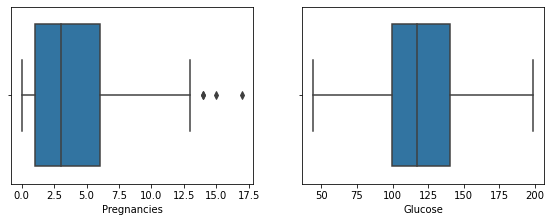

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sb.boxplot(data["Pregnancies"])
plt.subplot(4,4,2)
sb.boxplot(data["Glucose"])


C:\Users\grego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\grego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


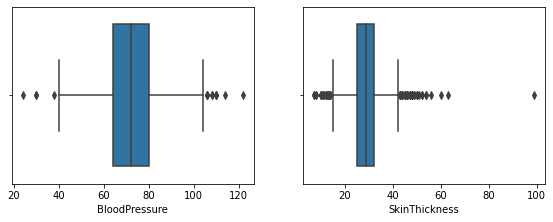

In [14]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,3)
sb.boxplot(data["BloodPressure"])
plt.subplot(4,4,4)
sb.boxplot(data["SkinThickness"])
plt.show()

C:\Users\grego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\grego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


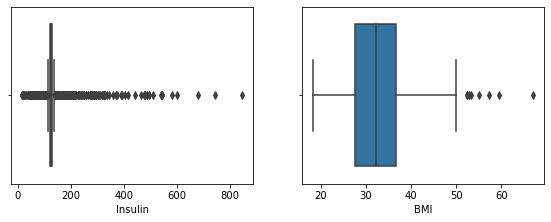

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,5)
sb.boxplot(data["Insulin"])
plt.subplot(4,4,6)
sb.boxplot(data["BMI"])
plt.show()

C:\Users\grego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\grego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


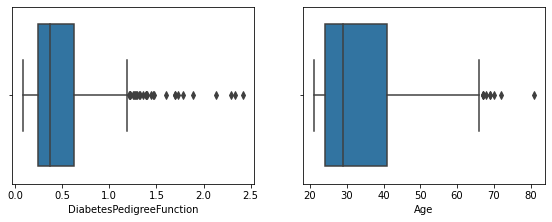

In [16]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,7)
sb.boxplot(data["DiabetesPedigreeFunction"])
plt.subplot(4,4,8)
sb.boxplot(data["Age"])
plt.show()

The above box plots show the general spread of all the features of the chosen dataset.

Generally, most features are spread out with alot of varience and many outliers.

### 6.Visualise key data series within the dataset by using the appropriate graphs. 

C:\Users\grego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


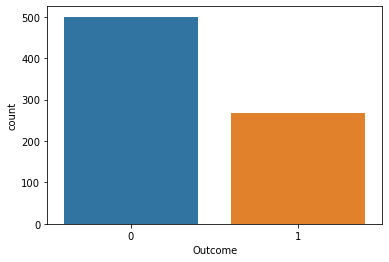

In [17]:
sb.countplot(data["Outcome"])
plt.show()

C:\Users\grego\AppData\Local\Temp\ipykernel_14108\139794784.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sb.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220,10,as_cmap=True),


<AxesSubplot:>

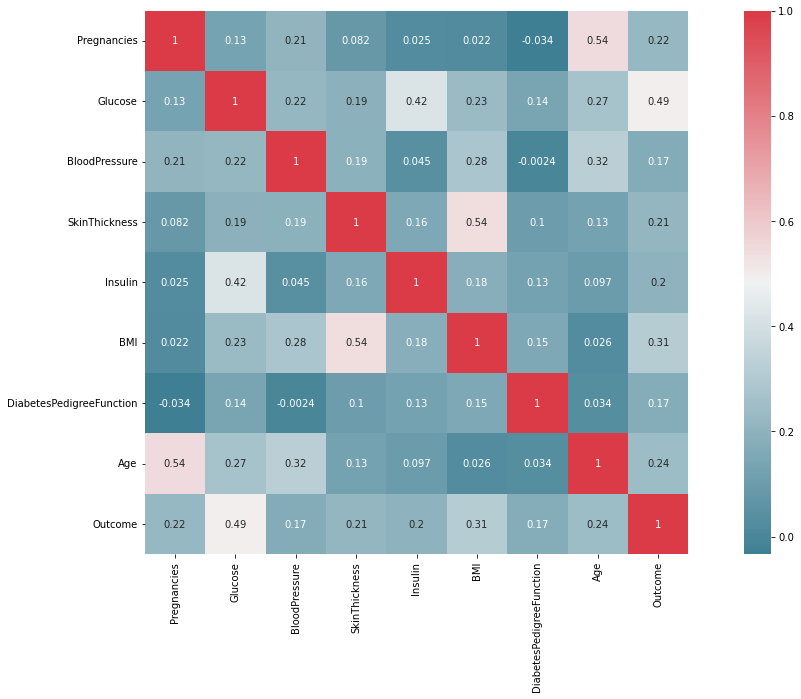

In [18]:
f,ax = plt.subplots(figsize=(20,10))

corr = data.corr("pearson")

sb.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220,10,as_cmap=True),
          square=True,ax=ax,annot=True)

In the above heatmap we can observe that the higher correlation of each feature with another. The closer the value to 1 the higher chance that the indvidual has diabetes. 

It can be seen that certain pairs of features such as, age and pregnancies, glucose and pregnancies, BMI and skin thickness. When  

### 7.Identify the features and the labels which will be used in the data regression model and justify why they were selected. 

Though the earlier graph show some correlation between certain pairs of features, their correalation is still not strong enough to be deterministic of if the patient has diabetes or not.

Thus i will be using all the features for the data regression model.

As the problem of predicting if a person has diabetes is quite critical as the treatment of it should be started as soon as possible.

K nearest neighbour is a generally accurate and thus can be trusted for this application

In [19]:
x=pd.DataFrame(data,columns=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]).values
y=data.Outcome.values.reshape(-1,1)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [21]:
k=20

acc=np.zeros((k))
#try k values from 1 to 20
for i in range(1, k+1):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train.ravel())
    y_pred=clf.predict(x_test)
    acc[i-1]=metrics.accuracy_score(y_test,y_pred)
acc

array([0.6969697 , 0.74891775, 0.73160173, 0.77056277, 0.76623377,
       0.76190476, 0.75757576, 0.77489177, 0.76190476, 0.77489177,
       0.76623377, 0.78354978, 0.76623377, 0.78354978, 0.76190476,
       0.78354978, 0.77489177, 0.78354978, 0.76623377, 0.77922078])

In [22]:
print(np.max(acc))
print(np.min(acc))

0.7835497835497836
0.696969696969697


As shown above the best accuray of the model is 0.7835497835497836, and this accurary is achieved with the higher values of k

III.Conclusions
---
9.Evaluate the results of the machine learning model. Use measures such as RMSE to numerically evaluate the performance of the model.

10.Provide a reflective evaluation of the developed project in light of the obtained results.

Describe its contributions to the selected domain-specific area. Discuss whether the solution is transferable to other domain-specific areas. Discuss whether the project can be reproduced by using different programming languages, development environments, ML libraries and ML
algorithms. Review the possible benefits or drawbacks of different approaches.

In [25]:
k=20
rmse=np.zeros((k))
for i in range(1, k+1):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train.ravel())
    y_pred=clf.predict(x_test)
    rmse[i-1]=metrics.mean_squared_error(y_test,y_pred)
rmse

array([0.3030303 , 0.25108225, 0.26839827, 0.22943723, 0.23376623,
       0.23809524, 0.24242424, 0.22510823, 0.23809524, 0.22510823,
       0.23376623, 0.21645022, 0.23376623, 0.21645022, 0.23809524,
       0.21645022, 0.22510823, 0.21645022, 0.23376623, 0.22077922])

In [27]:
print(np.min(rmse))

0.21645021645021645


As represented by the accuracy, the rmse of higher values of k is lower as the predications are closer to the actual results.

### Final Contributions to domain-specific area

The final predictions indicate that the chosen regression model is very well suited for this domain, the regression model would be good for other domains which require higher accucary in the predictions. 

The project can easily be replicated with other languages and ML libraries and algorithms as the predicitions is only 2 outcomes.

If other approaches were to be used the accuracy might be higher. The chosen liberary SKlearn is not optimized for graph algorithms, and it is not very good at string processing, with our dataset chosen mostly consisting of int and float, it was well suited for the task.